In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt
from shapely.geometry import Polygon
from matplotlib.patches import Circle
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.patches import Circle

## 导入数据

In [129]:
Bus_Stops = pd.read_csv("data\Bus_Stops.csv")

Bus_Stops["Routes_Ser_Num"] = Bus_Stops["Routes_Ser"].apply(
    lambda row: len(row.split(",")) if isinstance(row, str) else 0
)

In [131]:

boundary = [
    (39.371941, -76.711313),
    (39.277884, -76.711057),
    (39.234407, -76.611701),
    (39.207324, -76.583256),
    (39.197303, -76.550125),
    (39.209958, -76.529853),
    (39.210583, -76.547596),
    (39.206427, -76.559440),
    (39.206935, -76.574141),
    (39.208806, -76.583167),
    (39.213900, -76.581012),
    (39.213842, -76.587216),
    (39.214590, -76.587216),
    (39.216806, -76.579267),
    (39.226768, -76.581499),
    (39.225396, -76.576594),
    (39.232150, -76.559223),
    (39.244831, -76.567897),
    (39.253668, -76.583824),
    (39.246731, -76.591901),
    (39.245688, -76.592496),
    (39.244291, -76.607345),
    (39.256542, -76.616088),
    (39.256219, -76.625109),
    (39.259550, -76.629966),
    (39.266534, -76.623582),
    (39.256112, -76.609843),
    (39.264982, -76.606196),
    (39.266714, -76.601577),
    (39.261634, -76.579283),
    (39.279582, -76.592497),
    (39.276574, -76.576399),
    (39.270792, -76.559922),
    (39.260458, -76.571542),
    (39.269474, -76.555801),
    (39.258524, -76.554056),
    (39.252465, -76.541847),
    (39.254084, -76.529909),
    (39.372091, -76.529813),  # 最后一个坐标
]


## 绘制热力图

C:\Users\wzh20\AppData\Local\Temp\ipykernel_57616\4078757921.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


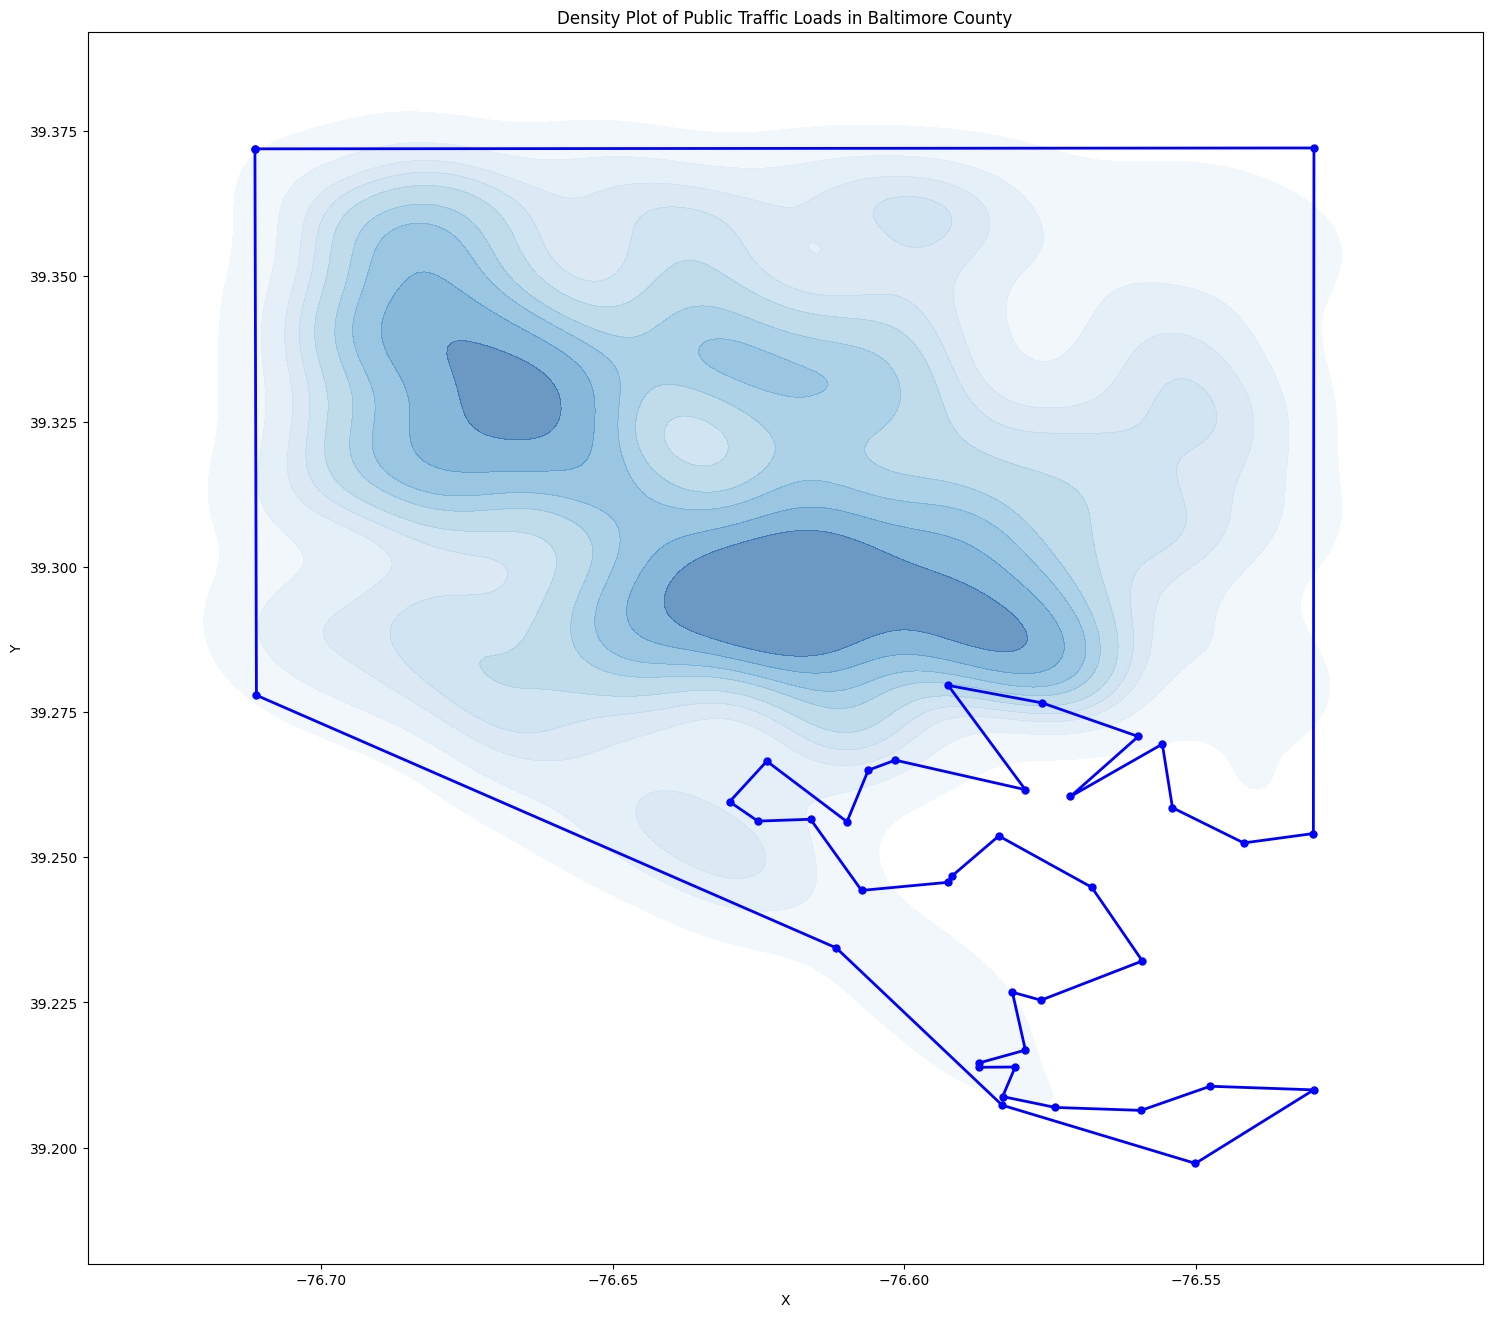

In [154]:

plt.figure(figsize=(18, 16))
# 将外部边界坐标转换为多边形对象
lats, lons = zip(*boundary)
polygon_blue = Polygon(zip(lons, lats))
plt.plot(
    lons + (lons[0],),
    lats + (lats[0],),
    marker="o",
    color="blue",
    linestyle="-",
    linewidth=2,
    markersize=5,
    label="Baltimore County Boundary",
)
sns.kdeplot(
    x=Bus_Stops["X"],
    y=Bus_Stops["Y"],
    cmap="Blues",
    fill=True,
    alpha=0.6,
    shade=True,
    weights=Bus_Stops["Stop_Rider"],
    bw_adjust=0.8,  # 减小带宽调整因子来减少扩散
)
plt.title("Density Plot of Public Traffic Loads in Baltimore County")
plt.show()

# 非加权聚类

## 聚类

d:\Workspace\ICM-2025\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


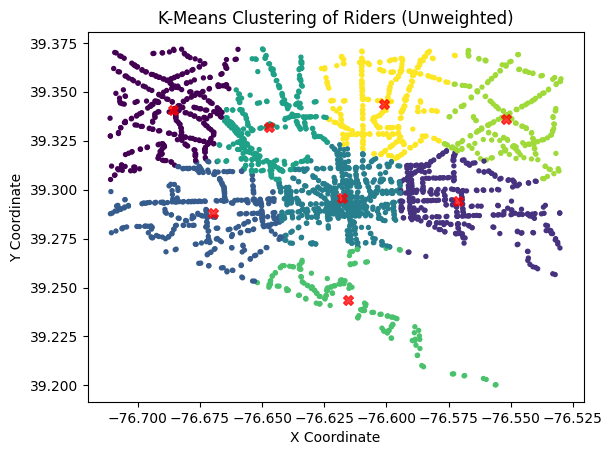

聚类中心：
[[-76.68570406  39.34042353]
 [-76.57105149  39.29399694]
 [-76.66973507  39.28784298]
 [-76.61779662  39.29578495]
 [-76.64714522  39.33183375]
 [-76.61542872  39.24366847]
 [-76.55184917  39.33630205]
 [-76.60107633  39.3436223 ]]
数据点的标签：
[4 0 0 ... 3 3 1]


In [146]:
from sklearn.cluster import KMeans

coordinates = np.column_stack((Bus_Stops.X, Bus_Stops.Y))

kmeans = KMeans(n_clusters=8, random_state=42)

kmeans.fit(coordinates)

y_kmeans = kmeans.predict(coordinates)

plt.scatter(Bus_Stops.X, Bus_Stops.Y, c=y_kmeans, s=8, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=50, alpha=0.75, marker="X")

plt.title("K-Means Clustering of Riders (Unweighted)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

print("聚类中心：")
print(centers)
print("数据点的标签：")
print(y_kmeans)

## 可视化

C:\Users\wzh20\AppData\Local\Temp\ipykernel_57616\1656071046.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


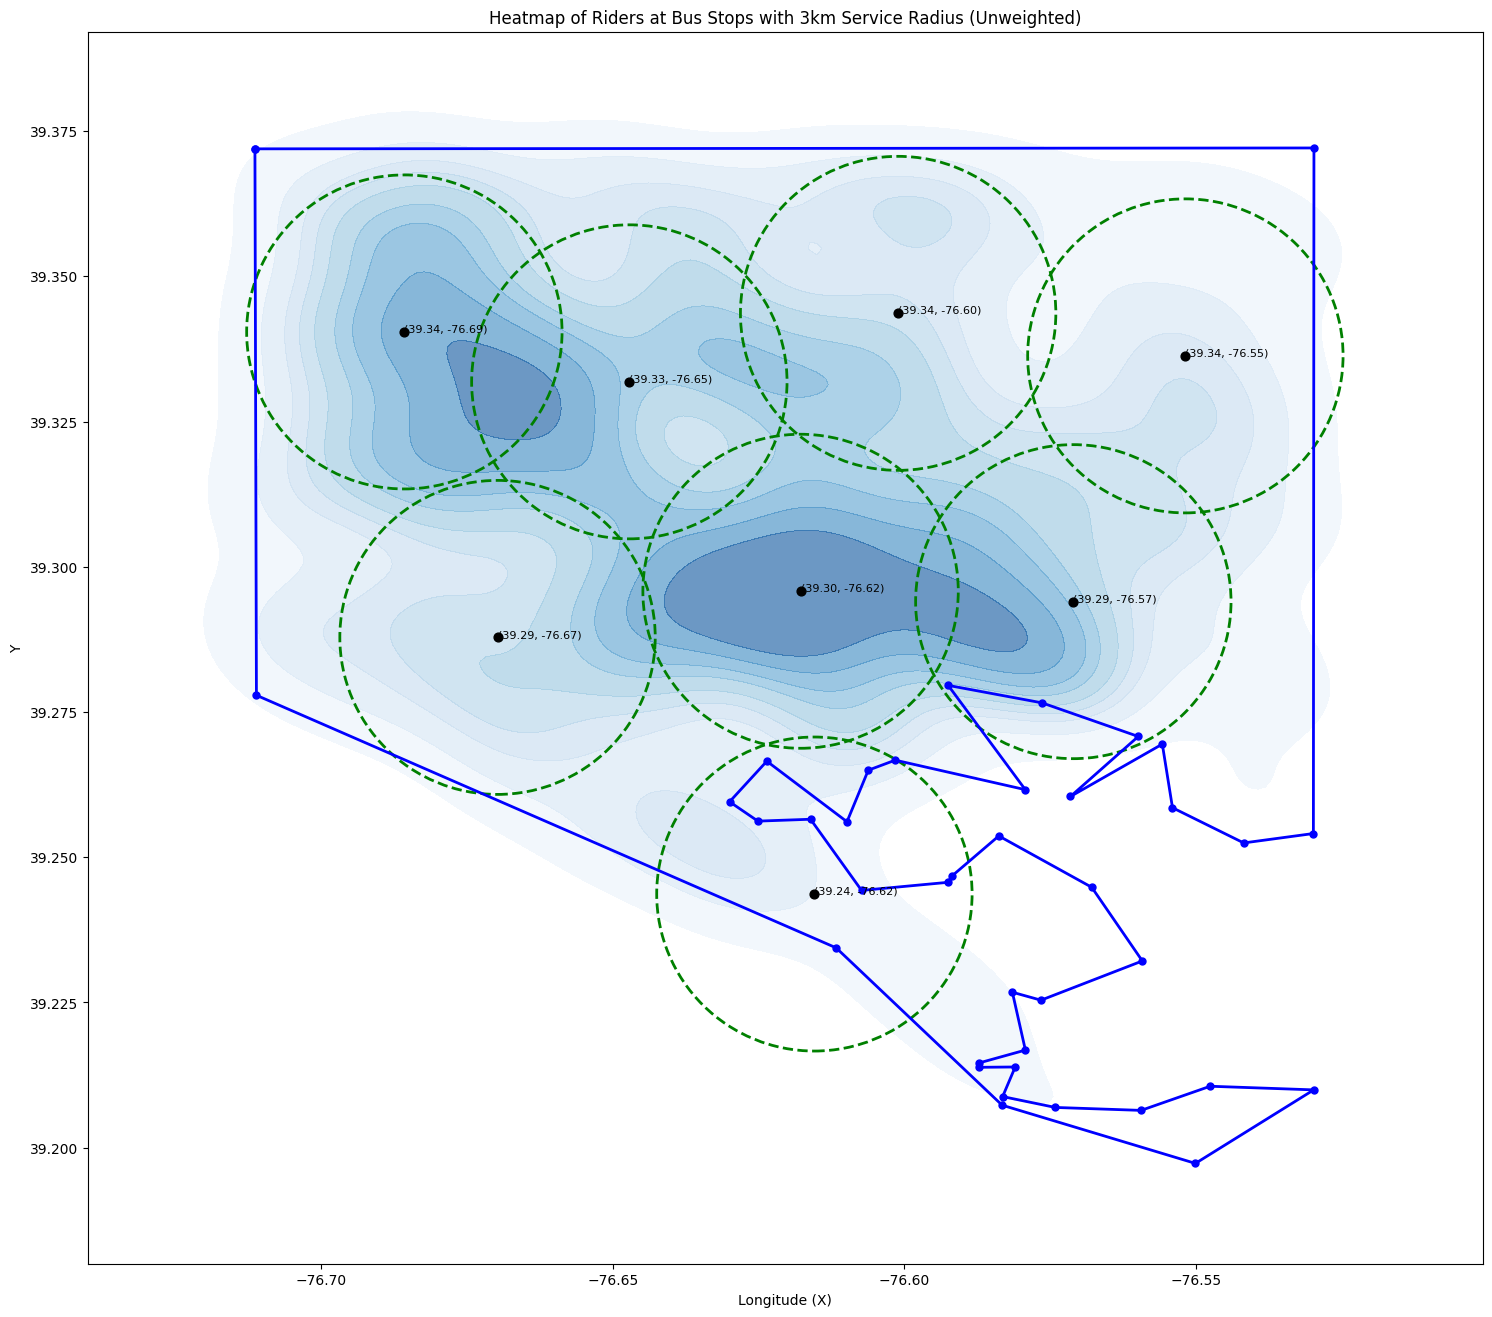

In [147]:
# Convert numpy array to list and swap coordinates
Bus_Stops_Big_old = []
for i in centers.tolist():
    Bus_Stops_Big_old.append([i[1], i[0]])
x_coords_add, y_coords_add = zip(*Bus_Stops_Big_old)

# 将外部边界坐标转换为多边形对象
lats, lons = zip(*boundary)
polygon_blue = Polygon(zip(lons, lats))

plt.figure(figsize=(18, 16))

# 修改 kde plot 参数以减小热力图的扩散范围
sns.kdeplot(
    x=Bus_Stops["X"],
    y=Bus_Stops["Y"],
    cmap="Blues",
    fill=True,
    alpha=0.6,
    shade=True,
    weights=Bus_Stops["Stop_Rider"],
    bw_adjust=0.8  # 减小带宽调整因子来减少扩散
)

plt.plot(
    lons + (lons[0],),
    lats + (lats[0],),
    marker="o",
    color="blue",
    linestyle="-",
    linewidth=2,
    markersize=5,
    label="Baltimore County Boundary",
)

plt.scatter(y_coords_add, x_coords_add, color="black", s=40, label="Bus Stops_Big")

radius_km = 3  # 半径为3km
for lat, lon in Bus_Stops_Big_old:
    circle = Circle(
        (lon, lat),
        radius=radius_km / 111,
        color="green",
        fill=False,
        linestyle="--",
        linewidth=2,
    )
    plt.text(lon, lat, "({:.2f}, {:.2f})".format(lat, lon), fontsize=8)
    plt.gca().add_patch(circle)

plt.xlabel("Longitude (X)")
plt.title("Heatmap of Riders at Bus Stops with 3km Service Radius (Unweighted)")

plt.show()

# 加权聚类

## 归一化

In [137]:
scaler = MinMaxScaler()

Bus_Stops["weight"] = scaler.fit_transform(Bus_Stops[["Rider_Tota"]])
print(Bus_Stops)

              Y          X                            stop_name  Rider_On  \
0     39.350945 -76.660393  CYLBURN AVE & GREENSPRING AVE fs wb       201   
1     39.351545 -76.663359       LANIER AVE & SINAI HOSPITAL sb        38   
2     39.352749 -76.664492        LANIER AVE & BELVEDERE AVE nb       147   
3     39.346756 -76.658233     YELLOWOOD AVE & FLAX TERR OPP sb        51   
4     39.348262 -76.654797      TAMARIND RD & SPRINGARDEN DR nb        19   
...         ...        ...                                  ...       ...   
2649  39.304160 -76.620846            DOLPHIN ST & HOWARD ST eb         0   
2650  39.289560 -76.619425  HOWARD ST & BALT & FAIRMOUNT mis nb         0   
2651  39.302268 -76.615970             CHARLES ST & CHASE ST nb         0   
2652  39.287096 -76.623588         GREENE ST & LOMBARD ST sb fs         0   
2653  39.295461 -76.590797                WOLFE ST & ORLEANS ST         0   

      Rider_Off  Rider_Tota  Stop_Rider                    Routes_Ser  \
0 

## 聚类

d:\Workspace\ICM-2025\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


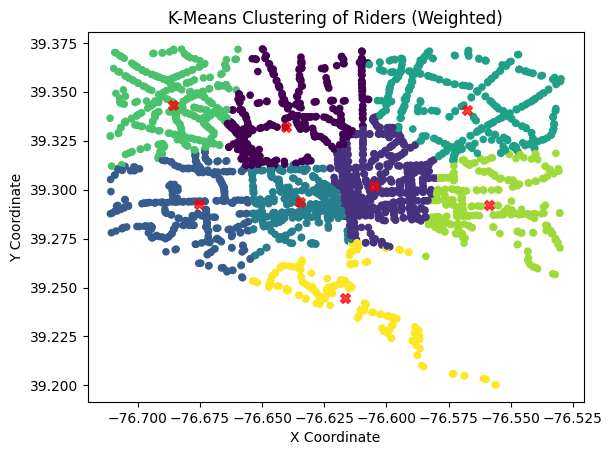

聚类中心：
[[-76.64028753  39.331741  ]
 [-76.60481328  39.30166157]
 [-76.67531273  39.29256121]
 [-76.63484687  39.29387779]
 [-76.56747969  39.3405556 ]
 [-76.68600391  39.3432006 ]
 [-76.55864372  39.29216546]
 [-76.61674853  39.24486446]]
数据点的标签：
[5 5 5 ... 1 3 1]


In [138]:
coordinates = np.column_stack((Bus_Stops.X, Bus_Stops.Y))

kmeans = KMeans(n_clusters=8, random_state=42)

kmeans.fit(coordinates, sample_weight=Bus_Stops["weight"])

y_kmeans = kmeans.predict(coordinates)

plt.scatter(Bus_Stops.X, Bus_Stops.Y, c=y_kmeans, s=20, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=50, alpha=0.75, marker="X")

# 图标题和坐标轴标签
plt.title("K-Means Clustering of Riders (Weighted)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# 显示图形
plt.show()

# 打印聚类中心和每个点的标签
print("聚类中心：")
print(centers)
Bus_Stops_Big_new = centers
print("数据点的标签：")
print(y_kmeans)

## 可视化

C:\Users\wzh20\AppData\Local\Temp\ipykernel_57616\3594347761.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


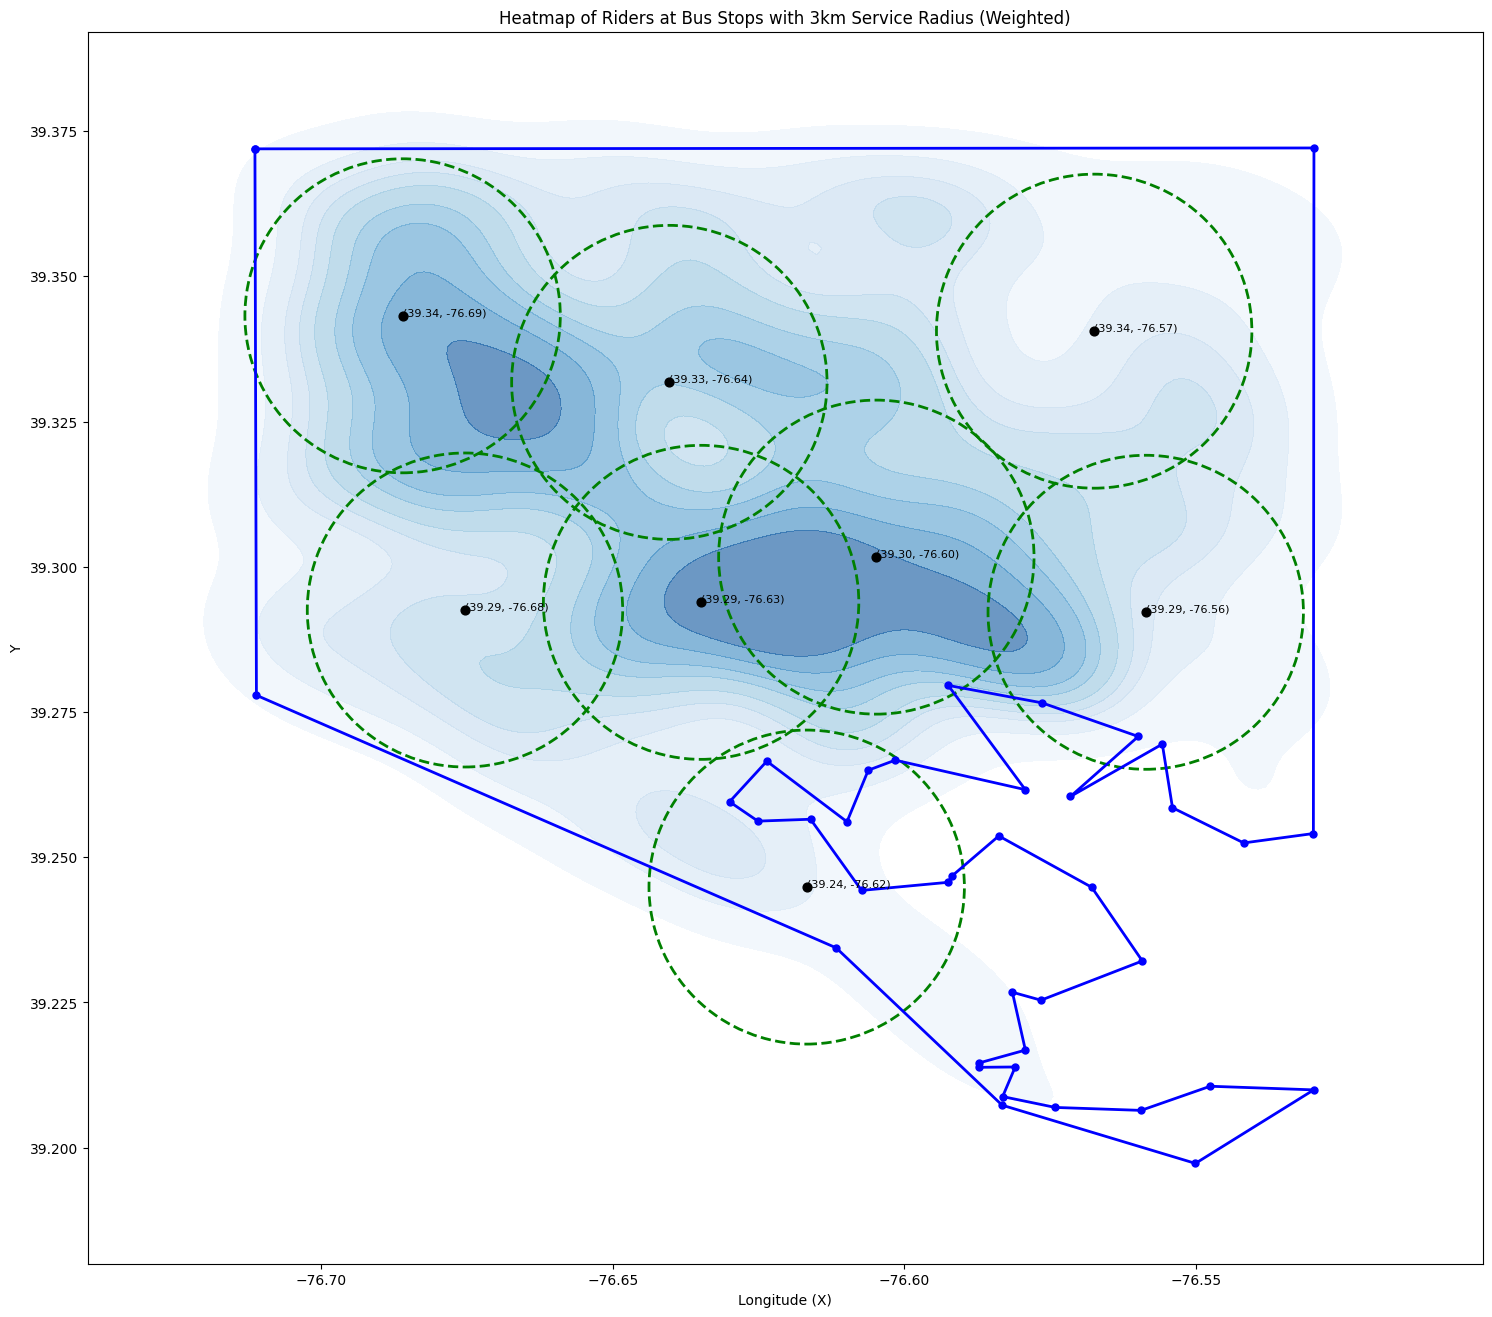

In [145]:
# Convert numpy array to list and swap coordinates
Bus_Stops_Big_new = []
for i in centers.tolist():
    Bus_Stops_Big_new.append([i[1], i[0]])
x_coords_add, y_coords_add = zip(*Bus_Stops_Big_new)

# 将外部边界坐标转换为多边形对象
lats, lons = zip(*boundary)
polygon_blue = Polygon(zip(lons, lats))

plt.figure(figsize=(18, 16))

# 修改 kde plot 参数以减小热力图的扩散范围
sns.kdeplot(
    x=Bus_Stops["X"],
    y=Bus_Stops["Y"],
    cmap="Blues",
    fill=True,
    alpha=0.6,
    shade=True,
    weights=Bus_Stops["Stop_Rider"],
    bw_adjust=0.8,  # 减小带宽调整因子来减少扩散
)
plt.plot(
    lons + (lons[0],),
    lats + (lats[0],),
    marker="o",
    color="blue",
    linestyle="-",
    linewidth=2,
    markersize=5,
    label="Baltimore County Boundary",
)

plt.scatter(y_coords_add, x_coords_add, color="black", s=40, label="Bus Stops_Big")

radius_km = 3  # 半径为3km
for lat, lon in Bus_Stops_Big_new:
    # 计算半径为3km的圆上的多个点
    circle = Circle(
        (lon, lat),
        radius=radius_km / 111,
        color="green",
        fill=False,
        linestyle="--",
        linewidth=2,
    )
    plt.text(lon, lat, "({:.2f}, {:.2f})".format(lat, lon), fontsize=8)
    plt.gca().add_patch(circle)
plt.xlabel("Longitude (X)")
plt.title("Heatmap of Riders at Bus Stops with 3km Service Radius (Weighted)")

plt.show()

# 计算负载

## 优化前

{(39.331833754152825, -76.64714522259136): 616711, (39.340423525198936, -76.68570406366048): 853839, (39.29578494642857, -76.617796625): 820591, (39.24366847096774, -76.61542871612903): 316138, (39.2939969375, -76.57105149456521): 651897, (39.28784298309859, -76.66973507323944): 594501, (39.34362230194805, -76.60107633116883): 520074, (39.33630204782609, -76.55184916956522): 372021}


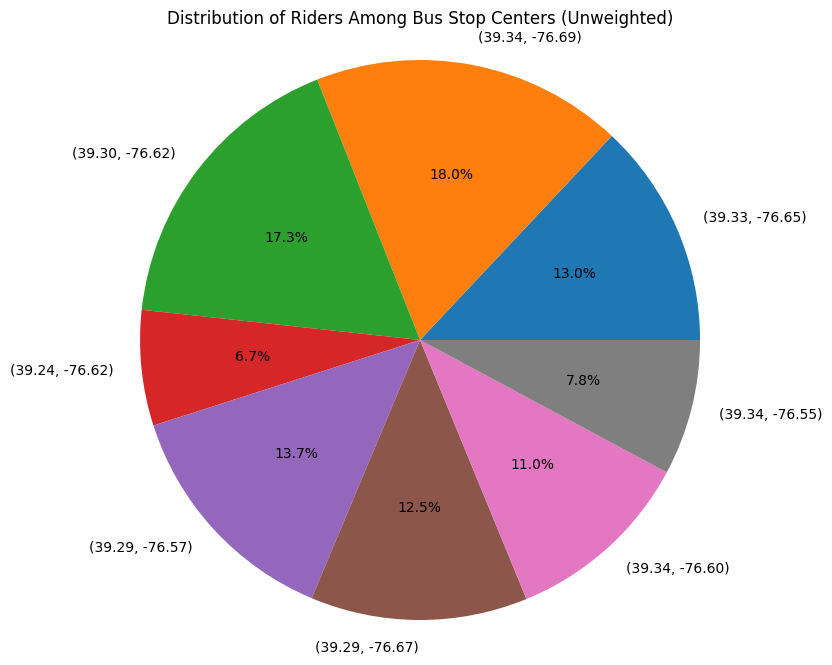

In [127]:
resident_load = dict()
def distance(x1, y1, x2, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
def get_nearby_central(bus_stop):
    min_dist = 999999
    for central in Bus_Stops_Big_old:
        dist = distance(bus_stop["X"], bus_stop["Y"], central[1], central[0])
        if dist < min_dist:
            min_dist = dist
            min_central = central
    return min_central
for _,row in Bus_Stops.iterrows():
    central_pt=get_nearby_central(row)
    if tuple(central_pt) in resident_load:
        resident_load[tuple(central_pt)]+=row["Stop_Rider"]
    else:
        resident_load[tuple(central_pt)]=row["Stop_Rider"]
print(resident_load)
# Create a pie chart for resident_load
plt.figure(figsize=(10, 8))
labels = [f'({lat:.2f}, {lon:.2f})' for lat, lon in resident_load.keys()]
sizes = list(resident_load.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Riders Among Bus Stop Centers (Unweighted)')
plt.axis('equal')
plt.show()

## 优化后

{(39.34320060247034, -76.68600391253047): 788124, (39.331740995622056, -76.64028753023669): 737354, (39.29387778595885, -76.63484687378941): 534138, (39.301661567620364, -76.60481328330785): 751945, (39.2448644588787, -76.61674852614264): 346063, (39.29216546475905, -76.5586437175533): 477290, (39.29256120567305, -76.67531273114223): 553860, (39.34055559532905, -76.56747969137864): 556998}


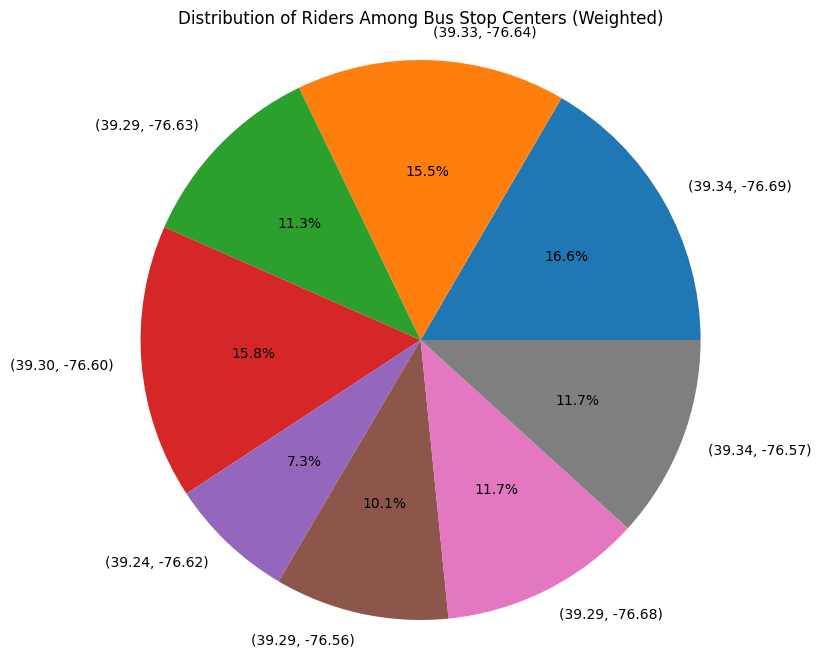

In [128]:
resident_load = dict()
def distance(x1, y1, x2, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
def get_nearby_central(bus_stop):
    min_dist = 999999
    for central in Bus_Stops_Big_new:
        dist = distance(bus_stop["X"], bus_stop["Y"], central[1], central[0])
        if dist < min_dist:
            min_dist = dist
            min_central = central
    return min_central
for _,row in Bus_Stops.iterrows():
    central_pt=get_nearby_central(row)
    if tuple(central_pt) in resident_load:
        resident_load[tuple(central_pt)]+=row["Stop_Rider"]
    else:
        resident_load[tuple(central_pt)]=row["Stop_Rider"]
print(resident_load)

# Create a pie chart for resident_load
plt.figure(figsize=(10, 8))
labels = [f'({lat:.2f}, {lon:.2f})' for lat, lon in resident_load.keys()]
sizes = list(resident_load.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Riders Among Bus Stop Centers (Weighted)')
plt.axis('equal')
plt.show()
